## Overview

In this notebook, we consider that the boundary of the containers (or part of it) is fully adsorbing. **i.e. whenever a molecule hits the boundary it is removed from the system.** Let us consider that the movement of the diffusing particles is restricted to the half space with a positive x-coordinate. i.e. $[X(t), Y(t), Z(t)] \in\{x>0\},$ where we use $\{x>0\}$ to denote the three-
dimensional space $(0, \infty) \times \mathbb{R} \times \mathbb{R} .$ **The boundary $\{x=0\}$ is assumed to be fully adsorbing**.

Now, we can focus on the evolution of the x-coordinate only. As before, we choose a small time step $\Delta t$ and we compute $X(t)$ iteratively by:

$$
X(t+\Delta t)=X(t)+\sqrt{2 D \Delta t} \xi\text{---(1)}
$$

However, there is still a **non-zero probability that the particle has hit the boundary $\{x=0\}$ sometimes during the time interval $(t, t+\Delta t) .$** It can be shown that the possibility is:

$$
\exp \left[\frac{-X(t) X(t+\Delta t)}{D \Delta t}\right]\text{---(2)}
$$

Thus, we can implement the fully adsorbing boundary condition at $x=0$ as follows:

1. compute the position $[X(t+\Delta t), Y(t+\Delta t), Z(t+\Delta t)]$

2. If $X(t+\Delta t)$ is less than zero, then we remove the molecule. 

3. If $X(t+\Delta t)$ is positive, then we genrate a random number $r$ uniformly in $(0,1)$ and we remove the molecule from the solution if $r<\exp [-X(t) X(t+\Delta t) /(D \Delta t)]$

## Proof for Equation (2)

Let $p(x,t)dt$ be the possibility of finding the particle within $[x,x+dx)$ at time t. From the SDE (1) we have the Fokker-Planck equation:

$$
\frac{\partial p}{\partial t}(x, t)=D \frac{\partial^{2} p}{\partial x^{2}}(x, t)
$$

If we use the initial condition of $p(x,0)=\delta(x_1)$, we have the following solution:

$$
p(x, t)=\frac{1}{(4 D \pi t)^{1 / 2}} \exp \left[-\frac{(x-x_1)^{2}}{4 D t}\right]
$$

Therefore, 
$$
P\{X(\Delta t)=x_2>0\}=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(x_2-x_1)^{2}}{4 D \Delta t}\right]
$$

The probability that the particle crossed the boundary and arrived at the point $x=x_{2}$ is equal to the probability the particle arrived at the point $x=-x_{2}$ (to justify this statement, note that every trajectory which has reached the boundary $x=0$ can be, after the hitting point, reflected around $x=0$ to get the trajectory which ends up at $x=-x_{2}$ ). Thus:

$$
P\{crossed, X(\Delta t)=x_2>0\}=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(-x_2-x_1)^{2}}{4 D \Delta t}\right]\\=\frac{1}{(4 D \pi \Delta t)^{1 / 2}} \exp \left[-\frac{(x_2+x_1)^{2}}{4 D \Delta t}\right]
$$

Therefore,

$$
P\{crossed| X(\Delta t)=x_2>0\}\\=P\{crossed, X(\Delta t)=x_2>0\}/P\{X(\Delta t)=x_2>0\}\\=\exp \left[\frac{-X(t) X(t+\Delta t)}{D \Delta t}\right]
$$

## System of many molecules

Let $p_{x}(x, t) \mathrm{d} x$ be the probability of finding a molecule in $[x, x+\mathrm{d} x),$ which, as we have seen, satisfies the diffusion equation:

$$
\frac{\partial p_{x}}{\partial t}(x, t)=D \frac{\partial^{2} p_{x}}{\partial x^{2}}(x, t)\text{---(3)}
$$

The boundary condition for $p_{x}$ at $x=0$. If we suppose that the initial density is equal to the constant $p_{in}$, then the solution to eqn.(3) is:

$$
p_{x}(x, t)=p_{\text {in}} \operatorname{erf}\left(\frac{x}{2 \sqrt{D t}}\right)
$$
$$
\operatorname{erf}(z)=\frac{2}{\sqrt{\pi}} \int_{0}^{z} \exp \left[-\zeta^{2}\right] \mathrm{d} \zeta
$$

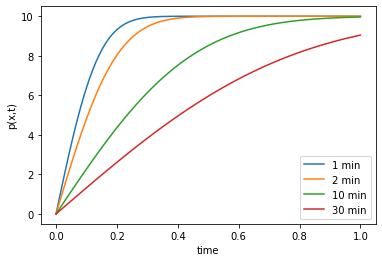

In [3]:
import numpy as np
from scipy import special
%matplotlib inline
import matplotlib.pyplot as plt

D = 0.0001
pin=10
L = 1
T = [60, 120, 600, 1800]
xs = np.linspace(0,L,100)
for t in T:
    ps = pin*special.erf(xs/(2*np.sqrt(D*t)))
    plt.plot(xs,ps,label="{} min".format(t//60))
plt.xlabel('time')
plt.ylabel('p(x,t)')
plt.legend()

**At any fixed point in space $[x, y, z]$ with $x > 0$ we have**
$$
\lim _{t \rightarrow \infty} p_{x}(x, t)=0\text{---(4)}
$$
**The eqn.(4) implies that the solution does not converge to a non-trivial steady-state profile.**

## Adsoption to Finite Size Objects

We now consider the adsorption of molecules by a sphere of radius $r_0$, and we study the diffusion of molecules in the domain exterior to the sphere. Our goal is to find **how the fully adsorbing sphere influences the concentration of molecules in its neighborhood.**

Let $c(x,y,z)$ be the average concentration of molecules in the solution at the steady state. The $c$ satisfies the steady-state version of the diffusion equation, which is the Laplace equation:

$$
D\left(\frac{\partial^{2} c}{\partial x^{2}}+\frac{\partial^{2} c}{\partial y^{2}}+\frac{\partial^{2} c}{\partial z^{2}}\right)=0\text{---(4)}
$$

The boundary condition for (4) are:
$$
\begin{aligned} c(x, y, z) & \equiv c(r) &=0, & \text { for } r=r_{0} \\ c(x, y, z) & \equiv c(r) &=c_{\infty}, & \text { for } r \rightarrow \infty \end{aligned}
$$

where $r=\sqrt{x^{2}+y^{2}+z^{2}}$. The solution of the Laplace equation is:
$$
c(x, y, z)=c_{\infty}\left(1-\frac{r_{0}}{\sqrt{x^{2}+y^{2}+z^{2}}}\right)=c_{\infty}\left(1-\frac{r_{0}}{r}\right) \quad \text { for } r>r_{0}
$$

Since the system is radially symmetric, the flux is constant along the boundary $r=r_0$, and it can be caluclated as:

$$
J\left(r_{0}\right)=D \frac{\partial c}{\partial r}\left(r_{0}, 0,0\right)=\frac{D c_{\infty}}{r_{0}}
$$

Consequently, the average number of molecules that are removed by the adsorbing sphere per unit time is given as a product of $J\left(r_{0}\right)$ and the area of the sphere $4 \pi r_{0}^{2},$ so that

$$
J_{\mathrm{sphere}}=4 \pi D c_{\infty} r_{0}
$$

Next, we consider a sphere covered by $k$ small adsorbing discs (i.e. a partially adsorbing sphere). Each disc has diameter of s. Now, the average number of molecules that are removed by the sphere per unit of time is 
$$
J_{\text {sphere-with-receptors }}=\frac{4 \pi D c_{\infty} r_{0} k s}{k s+2 \pi r_{0}}=\frac{J_{\text {sphere }}}{1+2 \pi r_{0} / k s}
$$

## Compartment SSA for Adsorbing B.C.
To implement the fully adsorbing boundary condition at $x = 0$, we simply add another reaction (a jump from the first compartment to the left where the molecules are removed from the solution)

$$
A_{1} \stackrel{d}{\longrightarrow} \emptyset
$$

In [1]:
import numpy as np
from numpy.random import uniform

def compartment(nc,ntot,d,ttot):
    t = 0
    alst = np.ones(nc,dtype=int)*(ntot//nc)
    alst[0]=0 # absorbing boundary
    fw = d*alst[:-1]
    bk = d*alst[1:]
    
    while t<ttot:
        
        a0 = np.sum(fw)+np.sum(bk)
        r1,r2 = uniform(size=2)
        t += 1/a0*np.log(1/r1)
        plst = np.cumsum(fw.tolist()+bk.tolist())/a0
        i = int(np.sum(plst<r2))
        
        if i==nc-1 and alst[1]>0:
            alst[1]-=1
        elif i<=nc-2 and alst[i]>0:
            alst[i]-=1
            alst[i+1]+=1
        elif alst[i-nc+2]>0:
            alst[i-nc+2]-=1
            alst[i-nc+1]+=1
                
        fw = d*alst[:-1]
        bk = d*alst[1:]
        
    return alst

Text(0, 0.5, 'count')

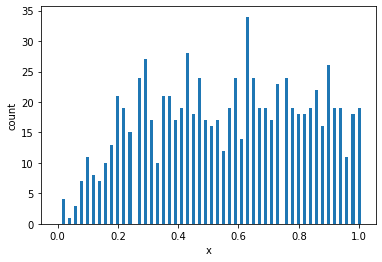

In [2]:
import numpy as np

D_h2 = 0.16
X0=[16,17]
N = 1000
T = 240
Nc = 50
As = compartment(Nc,N,D_h2,T)
%matplotlib inline
import matplotlib.pyplot as plt
plt.ticklabel_format(useOffset=False)
xs = np.round(np.linspace(0,1,Nc),2)
plt.bar(xs,As.tolist(),width=0.01)
plt.xlabel('x')
plt.ylabel('count')

## Average Absorbing Time

Let $\tau(y)$ be the average time to adsorb a molecule given that it started at $X(0)=y .$ since the adsorbing boundary is at $x=0,$ we can compute the average time to adsorb a molecule by **solving the equation related to the average time to first leave the interval $(0,L)$**. In this case, we have:
$$
-1=D \frac{\mathrm{d}^{2} \tau}{\mathrm{d} y^{2}}(y) \quad \text { for } y \in(0, L)
$$

with the boundary conditions

$$
\tau(0)=0, \quad \frac{\mathrm{d} \tau}{\mathrm{d} y}(L)=0
$$

Thus, we have:

$$
\tau(y)=\frac{2 L y-y^{2}}{2 D}
$$

If we have adsorbing boundary at both sides, $\tau(0)=\tau(L)=0$, the average adsorbing becomes:
$$
\tau(y)=\frac{L y-y^{2}}{2 D}
$$